In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECT/uk.xlsx',)




In [ ]:
df = df.set_index("year")
df

,Inflation
year,
1970-01-01,6.366570
1971-01-01,9.444843
1972-01-01,7.071092
1973-01-01,9.196043
1974-01-01,16.043989
1975-01-01,24.207294
1976-01-01,16.559526
1977-01-01,15.840269
1978-01-01,8.263137


In [ ]:
df=df['1970':] # filtering the use data from Jan/1980 onwards
df.tail()

,Inflation
year,
2017-01-01,2.683000
2018-01-01,2.320000
2019-01-01,1.791000
2020-01-01,0.989487
2021-01-01,2.500000


In [ ]:
!pip install forecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

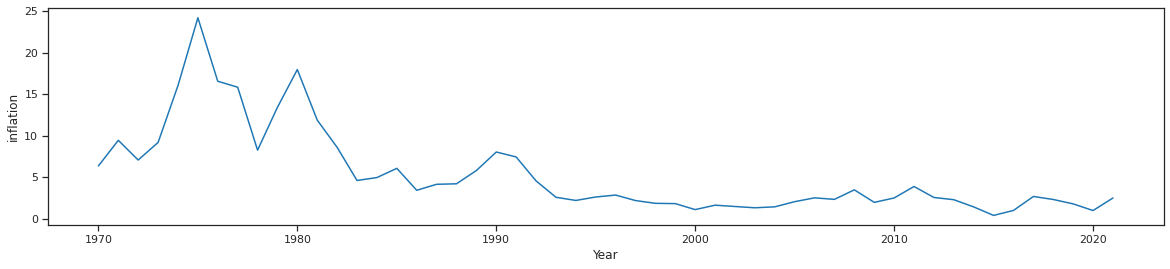

In [ ]:
# plot car count over all years
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('inflation')
plt.plot(df.index, df['Inflation']);     


In [ ]:
def test_stationarity(ts):
    stats = ['Test Statistic','p-value','Lags','Observations']
    df_test = adfuller(ts, autolag='AIC')
    df_results = pd.Series(df_test[0:4], index=stats)
    for key,value in df_test[4].items():
        df_results['Critical Value (%s)'%key] = value
    print (df_results)

In [ ]:
test_stationarity(df['Inflation'])

Test Statistic          -2.107952
p-value                  0.241329
Lags                     8.000000
Observations            43.000000
Critical Value (1%)     -3.592504
Critical Value (5%)     -2.931550
Critical Value (10%)    -2.604066
dtype: float64


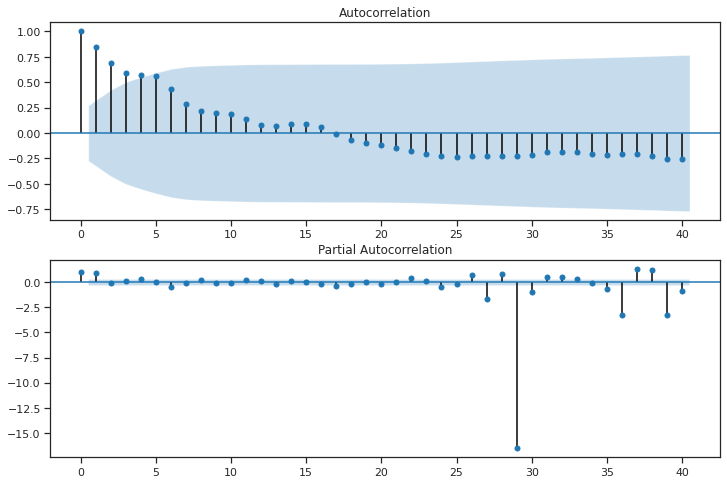

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1)   # first value of diff is NaN
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

                              ARMA Model Results                              
Dep. Variable:              Inflation   No. Observations:                   52
Model:                     ARMA(1, 0)   Log Likelihood                -126.044
Method:                       css-mle   S.D. of innovations              2.700
Date:                Wed, 29 Jun 2022   AIC                            258.088
Time:                        22:42:18   BIC                            263.942
Sample:                    01-01-1970   HQIC                           260.332
                         - 01-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1928      2.125      2.444      0.018       1.028       9.358
ar.L1.Inflation     0.8391      0.070     12.066      0.000       0.703       0.975
                                

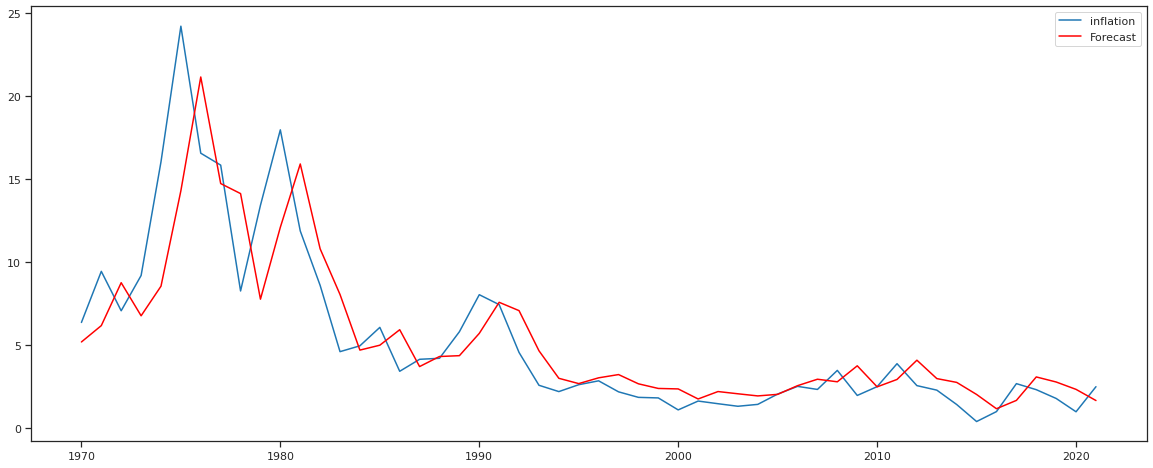

In [ ]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(df, order=(1,0,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df)
plt.plot(results.fittedvalues, color='red')
ax.legend(['inflation', 'Forecast'])
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:              Inflation   No. Observations:                   52
Model:                     ARMA(1, 1)   Log Likelihood                -125.861
Method:                       css-mle   S.D. of innovations              2.690
Date:                Wed, 29 Jun 2022   AIC                            259.722
Time:                        22:42:34   BIC                            267.527
Sample:                    01-01-1970   HQIC                           262.715
                         - 01-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2013      2.005      2.594      0.012       1.272       9.131
ar.L1.Inflation     0.8096      0.091      8.872      0.000       0.631       0.989
ma.L1.Inflation     0.1049      

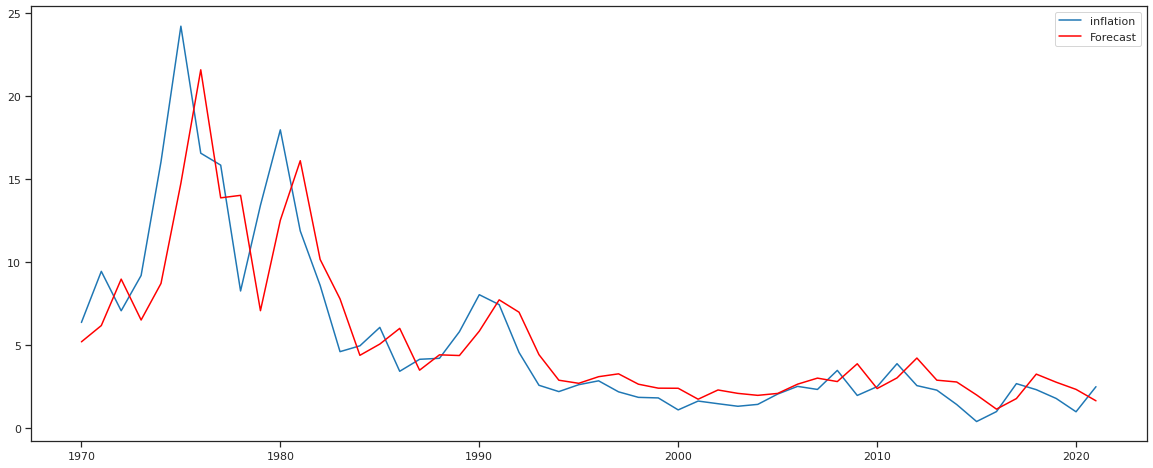

In [ ]:
fig = plt.figure(figsize=(20,8))
model = ARIMA(df, order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(df)
plt.plot(results.fittedvalues, color='red')
ax.legend(['inflation', 'Forecast'])

print (results.summary())

## LSTM

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

     |████████████████████████████████| 1.4 MB 23.7 MB/s 
     |████████████████████████████████| 9.8 MB 40.2 MB/s 


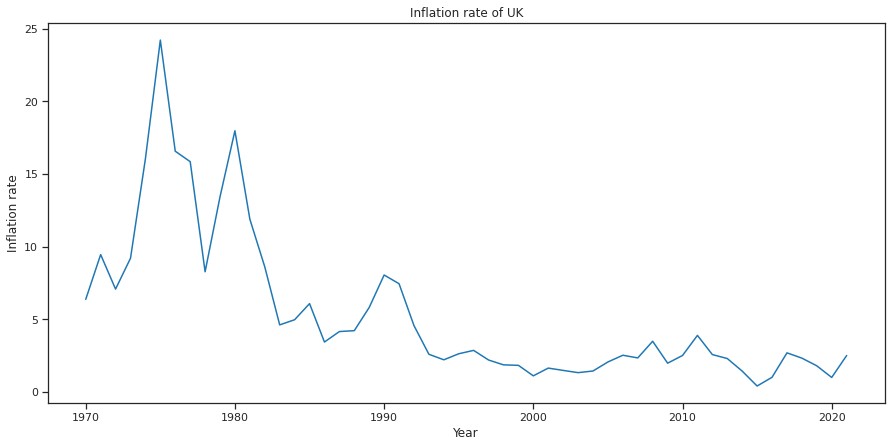

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Inflation rate of UK")
plt.xlabel('Year')
plt.ylabel('Inflation rate')
plt.plot(df)
plt.show()

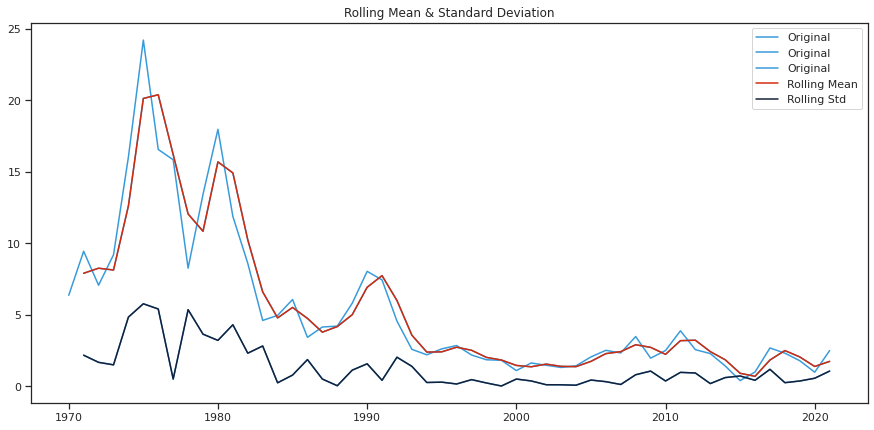

In [ ]:
#Determine rolling statistics
df["inflation_avg"] = df['Inflation'].rolling(2).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df["inflation_std"] =  df['Inflation'].rolling(2).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot( df, color='#379BDB', label='Original')
plt.plot( df["inflation_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["inflation_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['Inflation'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -2.107952
p-value                         0.241329
#Lags Used                      8.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [ ]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(df['Inflation'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -125.385
Date:                Wed, 29 Jun 2022   AIC                            252.770
Time:                        23:12:54   BIC                            254.701
Sample:                             0   HQIC                           253.508
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.9978      1.109      7.213      0.000       5.825      10.171
Ljung-Box (Q):                       32.00   Jarque-Bera (JB):                 9.21
Prob(Q):                              0.81   Pr

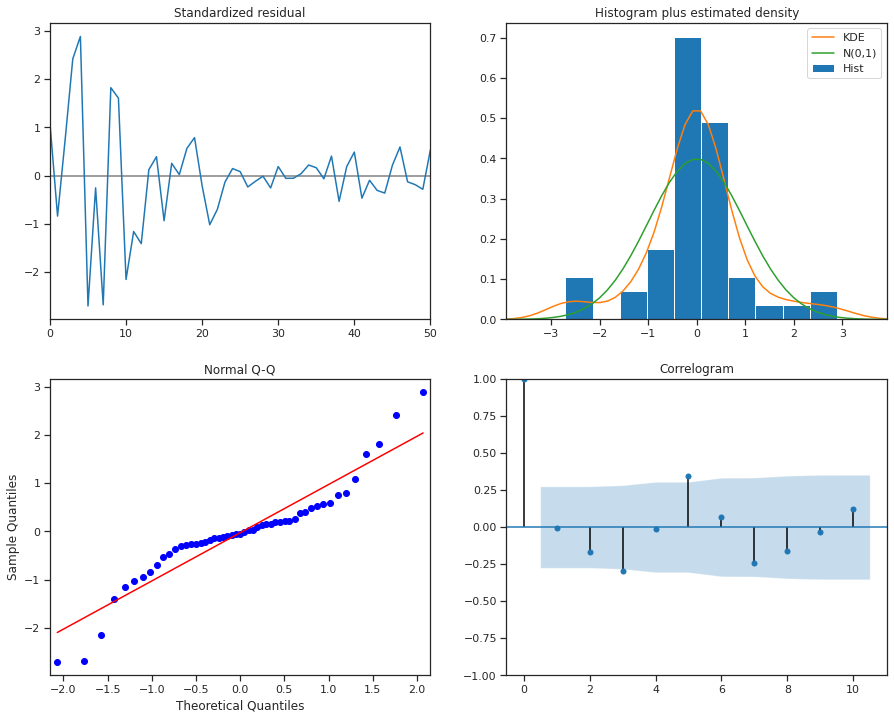

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

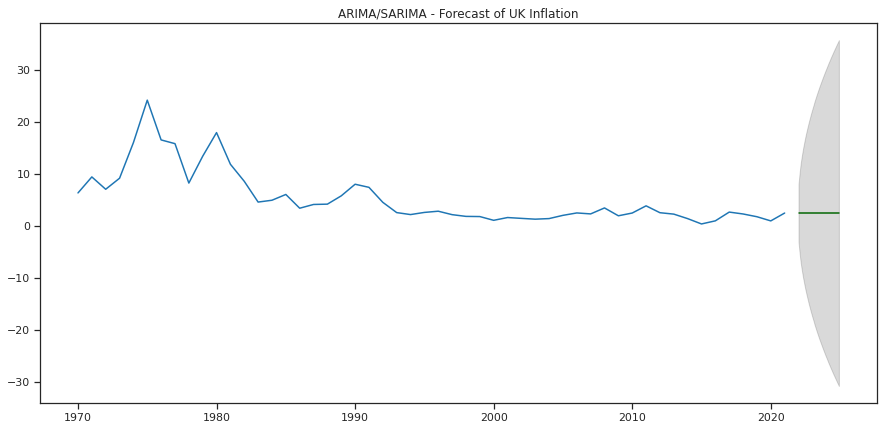

In [ ]:
def forecast(ARIMA_model, periods=36):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df['Inflation'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of UK Inflation")
    plt.show()

forecast(ARIMA_model)


## SARIMA Model Selection

In [ ]:
SARIMA_model = pm.auto_arima(df['Inflation'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

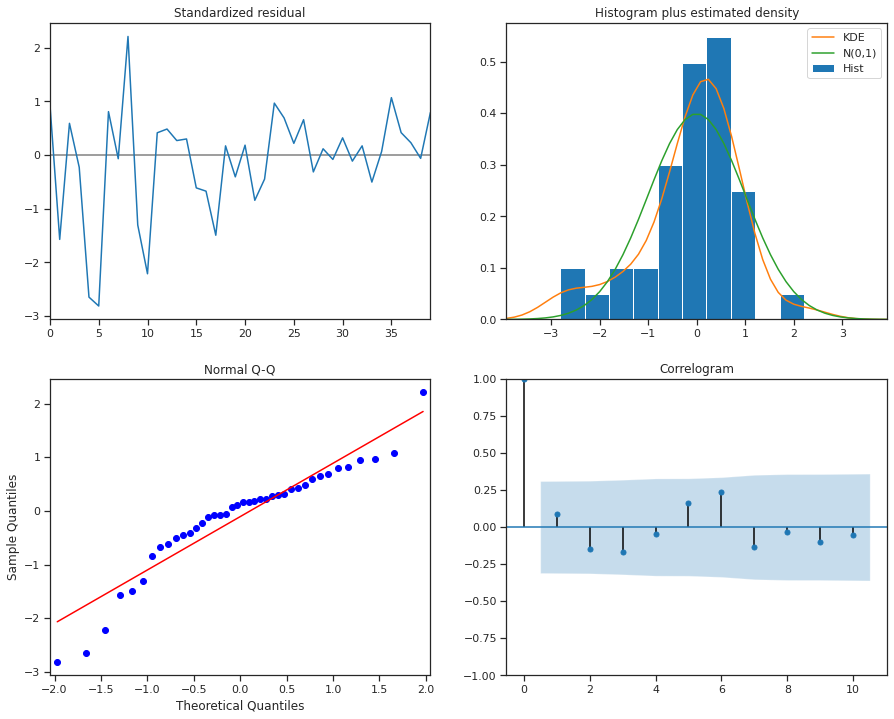

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

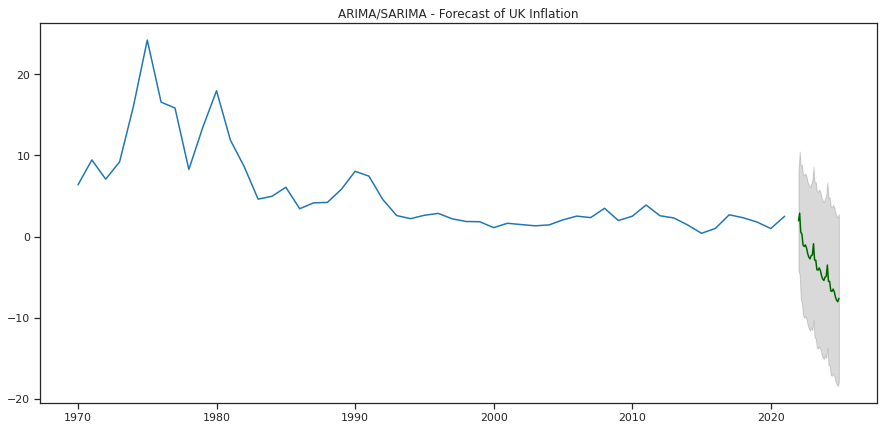

In [ ]:
forecast(SARIMA_model)

In [ ]:
#adding exogenous variable

df['year_index'] = df.index.year
# SARIMAX Model
SARIMAX_model = pm.auto_arima(df[['Inflation']],exogenous=df[['year_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(SARIMAX_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   52
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -100.982
Date:                            Wed, 29 Jun 2022   AIC                            213.965
Time:                                    23:32:44   BIC                            224.098
Sample:                                01-01-1970   HQIC                           217.629
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    695.4826    834.478      0.833      0.405    -940.064    2331.029
year_index  -110.7505    115.628   

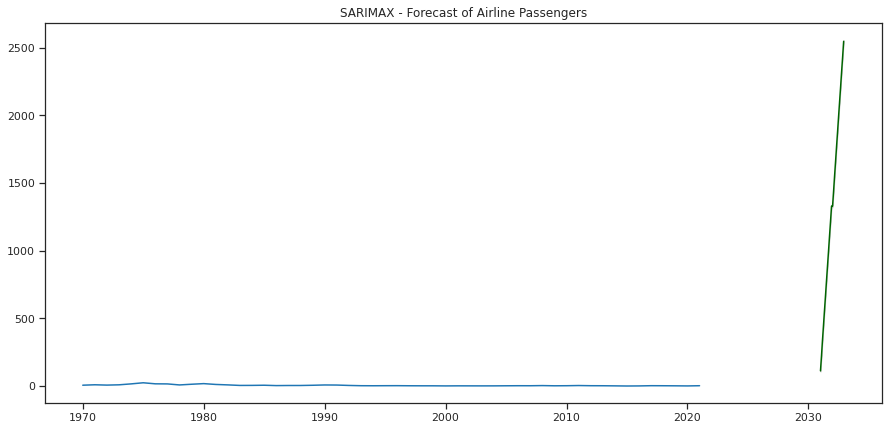

In [ ]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"year_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').year},
                    index = pd.date_range(df.index[-1]+ pd.DateOffset(years=10), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['year_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(years=10), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df['Inflation'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Airline Passengers")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=24)

### SRIMAX MODELLING

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:351.41074726861757
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:201.74928961709045
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:251.1964773054337
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:987.8936064822645
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:176.85722092134
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:165.03688695475083
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:133.20794978591036
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1093.5330021549792
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:297.02347061139125
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:158.70712470682534
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:218.37001427643807
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:971.0375103512248
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:158.02500042469484
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:137.3378575382162
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:118.21308734750437
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1077.2618141160187
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:247.66745500960934
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:119.84572554212136

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0492      0.195      0.252      0.801      -0.334       0.432
ar.S.L12      -0.1186      0.067     -1.775      0.076      -0.250       0.012
sigma2         1.8599      0.583      3.191      0.001       0.718       3.002


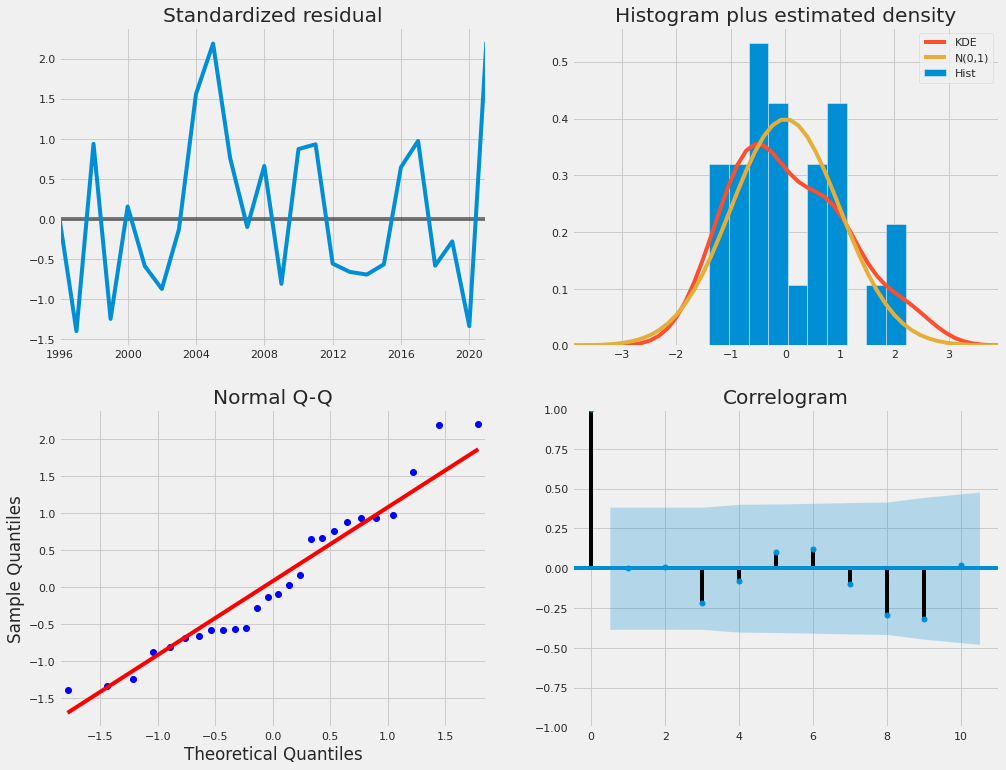

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('01-01-2010'), dynamic=False)
pred_ci = pred.conf_int()

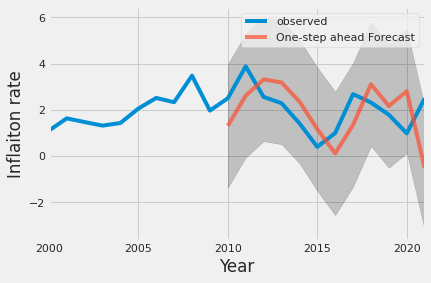

In [ ]:
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Inflaiton rate')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['01-01-2010':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.8


In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('01-01-2010'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

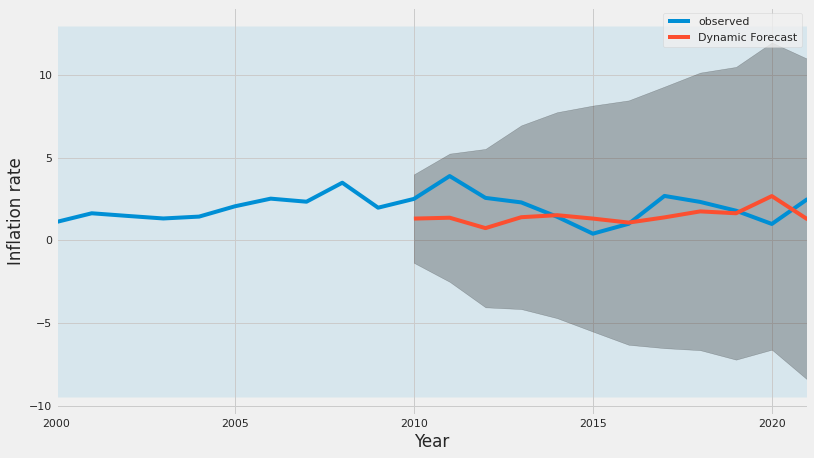

In [ ]:
ax = y['2000':].plot(label='observed', figsize=(12, 7))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Year')
ax.set_ylabel('Inflation rate')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['01-01-2010':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.59


In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

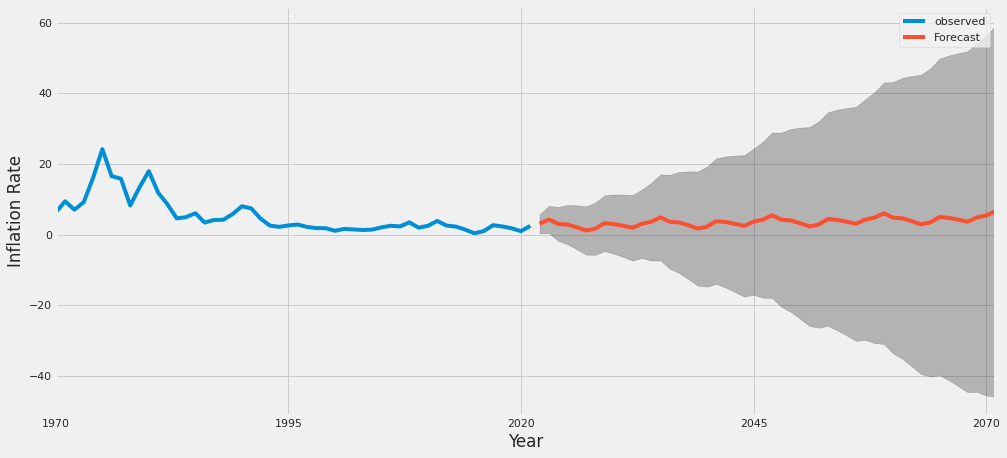

In [ ]:
ax = y.plot(label='observed', figsize=(15, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate')

plt.legend()
plt.show()